In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import norm
import statistics
import pandas_profiling
import pandas_profiling as pf
from pandas_profiling import ProfileReport
from sklearn import metrics

/var/folders/by/ymb55j1n39nd_1l6_11kg8j80000gn/T/ipykernel_13064/2799548875.py:17: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
kk=pd.read_csv('Iris_data.csv')

In [3]:
print(kk)
print(type(kk))

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>


In [4]:
kk.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
kk.shape

(150, 5)

In [6]:
kk.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
lp=np.std(kk)

/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [8]:
lp

sepal_length    0.825301
sepal_width     0.432147
petal_length    1.758529
petal_width     0.760613
dtype: float64

In [9]:
kk.std()

/var/folders/by/ymb55j1n39nd_1l6_11kg8j80000gn/T/ipykernel_13064/680340003.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kk.std()


sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

In [10]:
statistics.pstdev(kk['sepal_width'])

0.4321465800705435

In [11]:
sbi=lp**2

In [12]:
sbi

sepal_length    0.681122
sepal_width     0.186751
petal_length    3.092425
petal_width     0.578532
dtype: float64

In [13]:
statistics.variance(kk['sepal_width'])

0.18800402684563758

In [14]:
statistics.mean(kk['sepal_width'])

3.054

In [15]:
kk.sepal_width.mean()

3.0540000000000007

In [16]:
kk['sepal_width'].mean()

3.0540000000000007

In [17]:
kk.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [18]:
kk.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
np.mean(kk)

/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [20]:
kk['sepal_length'].mode()

0    5.0
Name: sepal_length, dtype: float64

In [21]:
kk['sepal_length'].median()

5.8

In [22]:
isa=kk.copy()

In [23]:
isa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
isa.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [25]:
isa.shape

(150, 5)

In [26]:
#individual data type use dtype
isa.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [27]:
isa.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [28]:
#for knowing about any particular data row
isa.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [29]:
isa.sepal_length.tail(4)

146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, dtype: float64

In [30]:
isa.sepal_length.head(4)

0    5.1
1    4.9
2    4.7
3    4.6
Name: sepal_length, dtype: float64

In [31]:
#second method to know about the dataset row is
isa['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [32]:
isa.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [33]:
isa.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [34]:
isa.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [35]:
isa.duplicated().sum()

3

In [36]:
isa.drop_duplicates(inplace=True)

In [37]:
isa.duplicated().sum()

0

In [38]:
#iloc is used to print rows and columns in a particular order
isa.iloc[0:2,0:3]

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4


In [39]:
isa.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[147 rows x 5 columns]>

In [40]:
isa.drop(0)#remove label but not parmanently

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [41]:
isa.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[147 rows x 5 columns]>

In [42]:
# to remove  permannenty we used inplace in drop method
isa.drop(0,inplace=True)

In [43]:
isa.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[146 rows x 5 columns]>

In [44]:
#second method for this is store the value in another variable
kkp=isa.drop(1)#all works upon labels


In [45]:
kkp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa


In [46]:
kkp.index

Int64Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            139, 140, 141, 143, 144, 145, 146, 147, 148, 149],
           dtype='int64', length=145)

In [47]:
kkp.index[0]

2

In [48]:
kkp.index[3]

5

In [49]:
# iwant to drop a rows using index
kkp.drop(kkp.index[0],inplace=True)

In [50]:
kkp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


In [51]:
kkp.petal_width>0.2

3      False
4      False
5       True
6       True
7      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: petal_width, Length: 144, dtype: bool

In [52]:
kkp.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,144.000000,144.000000,144.000000,144.000000
mean,5.876389,3.052083,3.830556,1.229861
std,0.825637,0.439798,1.742006,0.751416
min,4.300000,2.000000,1.000000,0.100000
25%,5.175000,2.800000,1.600000,0.375000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
kkp[kkp.petal_width>0.2]

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
15,5.7,4.4,1.5,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa
17,5.1,3.5,1.4,0.3,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
kkp[kkp.petal_width>0.2].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,115.000000,115.000000,115.000000,115.000000
mean,6.107826,2.966087,4.433043,1.493043
std,0.743055,0.420711,1.407170,0.600836
min,4.500000,2.000000,1.300000,0.300000
25%,5.600000,2.700000,4.000000,1.200000
50%,6.100000,3.000000,4.700000,1.500000
75%,6.600000,3.200000,5.400000,1.950000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
kkp[kkp.species =='virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,49.000000,49.000000,49.000000,49.000000
mean,6.604082,2.979592,5.561224,2.028571
std,0.632113,0.323380,0.553706,0.276887
min,4.900000,2.200000,4.500000,1.400000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,6.900000,3.200000,5.900000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [56]:
print(kkp.head())

   sepal_length  sepal_width  petal_length  petal_width species
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa


In [57]:
print(kkp.iloc[0])

sepal_length       4.6
sepal_width        3.1
petal_length       1.5
petal_width        0.2
species         setosa
Name: 3, dtype: object


In [58]:
print(kkp.iloc[2])#it works with index

sepal_length       5.4
sepal_width        3.9
petal_length       1.7
petal_width        0.4
species         setosa
Name: 5, dtype: object


In [59]:
#print(kkp.loc[0])
#work with labels so always use proper  level for perfect result
print(kkp.loc[3])

sepal_length       4.6
sepal_width        3.1
petal_length       1.5
petal_width        0.2
species         setosa
Name: 3, dtype: object


In [60]:
#try to add other row for this i used loc but it is used at the last position of the table with 0 level
kkp.loc[0]=[4.5,3.1,1.5,0.3,'setosa']

In [61]:
kkp.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica
0,4.5,3.1,1.5,0.3,setosa


In [62]:
#to solve the above problem we used a method to reset index to add this to last position and assign index new index

In [63]:
kkp.reset_index(inplace=True)

In [64]:
kkp.shape

(145, 6)

In [65]:
kkp.tail()

,index,sepal_length,sepal_width,petal_length,petal_width,species
140,146,6.3,2.5,5.0,1.9,virginica
141,147,6.5,3.0,5.2,2.0,virginica
142,148,6.2,3.4,5.4,2.3,virginica
143,149,5.9,3.0,5.1,1.8,virginica
144,0,4.5,3.1,1.5,0.3,setosa


In [66]:
kkp

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,3,4.6,3.1,1.5,0.2,setosa
1,4,5.0,3.6,1.4,0.2,setosa
2,5,5.4,3.9,1.7,0.4,setosa
3,6,4.6,3.4,1.4,0.3,setosa
4,7,5.0,3.4,1.5,0.2,setosa
...,...,...,...,...,...,...
140,146,6.3,2.5,5.0,1.9,virginica
141,147,6.5,3.0,5.2,2.0,virginica
142,148,6.2,3.4,5.4,2.3,virginica
143,149,5.9,3.0,5.1,1.8,virginica


In [67]:
#here two index are shown to remove this we used drop=true and true method
kkp.reset_index(drop=True,inplace=True)


In [68]:
kkp

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,3,4.6,3.1,1.5,0.2,setosa
1,4,5.0,3.6,1.4,0.2,setosa
2,5,5.4,3.9,1.7,0.4,setosa
3,6,4.6,3.4,1.4,0.3,setosa
4,7,5.0,3.4,1.5,0.2,setosa
...,...,...,...,...,...,...
140,146,6.3,2.5,5.0,1.9,virginica
141,147,6.5,3.0,5.2,2.0,virginica
142,148,6.2,3.4,5.4,2.3,virginica
143,149,5.9,3.0,5.1,1.8,virginica


In [69]:
#kkp.drop(columns=['index','level_0'],inplace=True)
kkp.drop(columns=['index'],inplace=True)

In [70]:
kkp

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.6,3.1,1.5,0.2,setosa
1,5.0,3.6,1.4,0.2,setosa
2,5.4,3.9,1.7,0.4,setosa
3,4.6,3.4,1.4,0.3,setosa
4,5.0,3.4,1.5,0.2,setosa
...,...,...,...,...,...
140,6.3,2.5,5.0,1.9,virginica
141,6.5,3.0,5.2,2.0,virginica
142,6.2,3.4,5.4,2.3,virginica
143,5.9,3.0,5.1,1.8,virginica


In [71]:
kkp.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,145.000000,145.000000,145.000000,145.000000
mean,5.866897,3.052414,3.814483,1.223448
std,0.830667,0.438286,1.746702,0.752774
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
kkp.loc[145]=[4.6,3.2,1.6,0.4,'virginica']

In [73]:
kkp.loc[146]=[4.8,3.7,1.7,0.6,'setosa']

In [74]:
kkp.loc[147]=[4.8,3.8,1.75,0.8,'setosa']

In [75]:
kkp.loc[148]=[4.1,3.9,1.9,0.8,'virginica']

In [76]:
kkp


,sepal_length,sepal_width,petal_length,petal_width,species
0,4.6,3.1,1.50,0.2,setosa
1,5.0,3.6,1.40,0.2,setosa
2,5.4,3.9,1.70,0.4,setosa
3,4.6,3.4,1.40,0.3,setosa
4,5.0,3.4,1.50,0.2,setosa
...,...,...,...,...,...
144,4.5,3.1,1.50,0.3,setosa
145,4.6,3.2,1.60,0.4,virginica
146,4.8,3.7,1.70,0.6,setosa
147,4.8,3.8,1.75,0.8,setosa


In [77]:
kkp.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.832215,3.068456,3.758725,1.208054
std,0.847035,0.445258,1.755645,0.748829
min,4.100000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
#delete a particular column use del method
del kkp['sepal_width']

In [79]:
kkp.describe()

,sepal_length,petal_length,petal_width
count,149.000000,149.000000,149.000000
mean,5.832215,3.758725,1.208054
std,0.847035,1.755645,0.748829
min,4.100000,1.000000,0.100000
25%,5.100000,1.600000,0.400000
50%,5.800000,4.300000,1.300000
75%,6.400000,5.100000,1.800000
max,7.900000,6.900000,2.500000


In [80]:
#add columnsa
kkp['colors']='white'

In [81]:
kkp.head()

,sepal_length,petal_length,petal_width,species,colors
0,4.6,1.5,0.2,setosa,white
1,5.0,1.4,0.2,setosa,white
2,5.4,1.7,0.4,setosa,white
3,4.6,1.4,0.3,setosa,white
4,5.0,1.5,0.2,setosa,white


In [82]:
nsp=kk.copy()

In [83]:
nsp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [84]:
nsp.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [85]:
nsp.iloc[2:3,2:4]=np.nan#null valuens

In [86]:
nsp

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,NaN,NaN,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [87]:
nsp.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,149.000000,149.000000
mean,5.843333,3.054000,3.775168,1.205369
std,0.828066,0.433594,1.758720,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [88]:
#3handling  missing data
nsp.dropna(inplace=True)
nsp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [89]:
nsp.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.00000,149.000000,149.000000
mean,5.851007,3.05302,3.775168,1.205369
std,0.825491,0.43489,1.758720,0.761292
min,4.300000,2.00000,1.000000,0.100000
25%,5.100000,2.80000,1.600000,0.300000
50%,5.800000,3.00000,4.400000,1.300000
75%,6.400000,3.30000,5.100000,1.800000
max,7.900000,4.40000,6.900000,2.500000


In [90]:
nsp.reset_index(drop=True,inplace=True)

In [91]:
nsp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [92]:
nsp.iloc[2:3,2:4]=np.nan

In [93]:
nsp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.6,3.1,NaN,NaN,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [94]:
#method second for handling missing value mean/mdiian/mode#most occuring value for satosa
nsp.petal_length.fillna(nsp.petal_length.mean(),inplace=True)

In [95]:
nsp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.400000,0.2,setosa
1,4.9,3.0,1.400000,0.2,setosa
2,4.6,3.1,3.790541,NaN,setosa
3,5.0,3.6,1.400000,0.2,setosa
4,5.4,3.9,1.700000,0.4,setosa


In [96]:
temp=nsp[nsp.species=='setosa']
nsp.petal_width.fillna(temp.petal_width.mean(),inplace=True)

In [97]:
nsp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.400000,0.200000,setosa
1,4.9,3.0,1.400000,0.200000,setosa
2,4.6,3.1,3.790541,0.245833,setosa
3,5.0,3.6,1.400000,0.200000,setosa
4,5.4,3.9,1.700000,0.400000,setosa


# Matplotlib introduction


In [98]:
import matplotlib.pyplot as plt

In [99]:
x=[1,2,3,4,5]

In [100]:
y=[1,2,3,4,5]

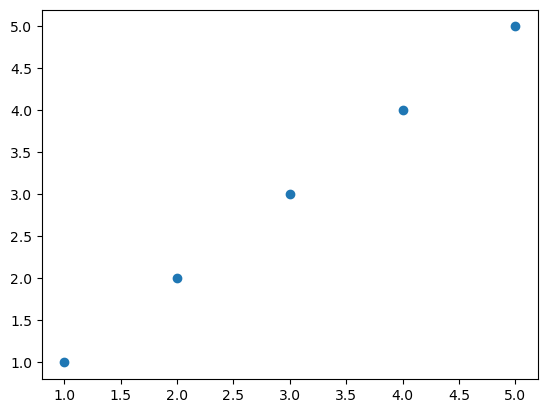

In [101]:
plt.scatter(x,y)
plt.show()

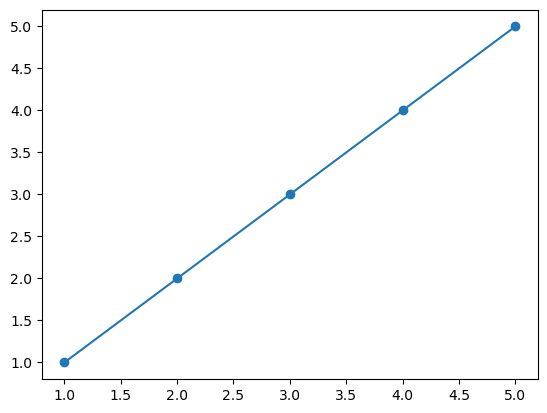

In [102]:
plt.scatter(x,y)
plt.plot(x,y)#for graph
plt.show()

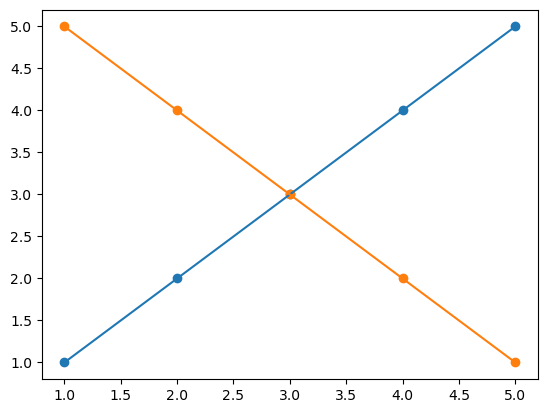

In [103]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
x2=[1,2,3,4,5]
y2=[5,4,3,2,1]
plt.scatter(x,y)
plt.scatter(x2,y2)
plt.plot(x,y)
plt.plot(x2,y2)
plt.show()

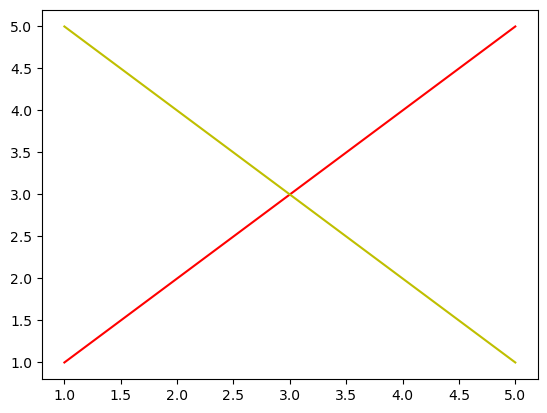

In [104]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
x2=[1,2,3,4,5]
y2=[5,4,3,2,1]
plt.plot(x,y,'r')
plt.plot(x2,y2,'y')
plt.show()

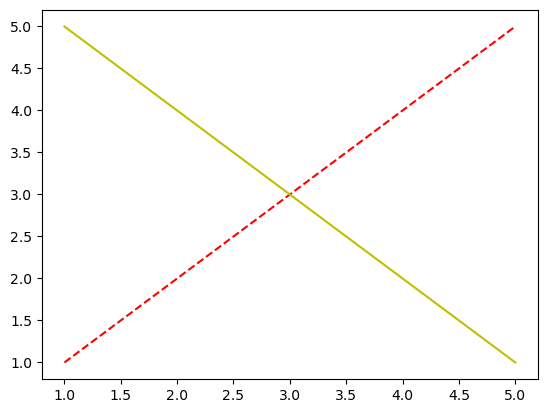

In [105]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
x2=[1,2,3,4,5]
y2=[5,4,3,2,1]
plt.plot(x,y,'r--')
plt.plot(x2,y2,'y')
plt.show()

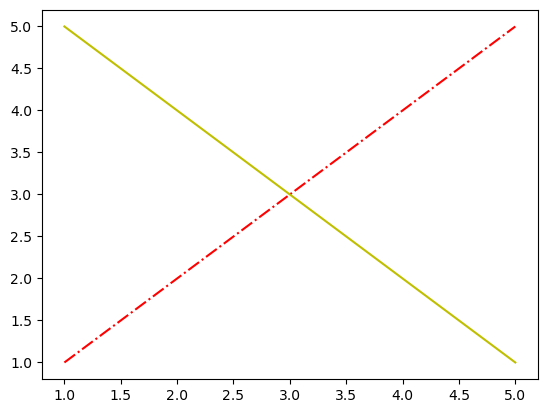

In [106]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
x2=[1,2,3,4,5]
y2=[5,4,3,2,1]
plt.plot(x,y,'r-.')
plt.plot(x2,y2,'y')
plt.show()

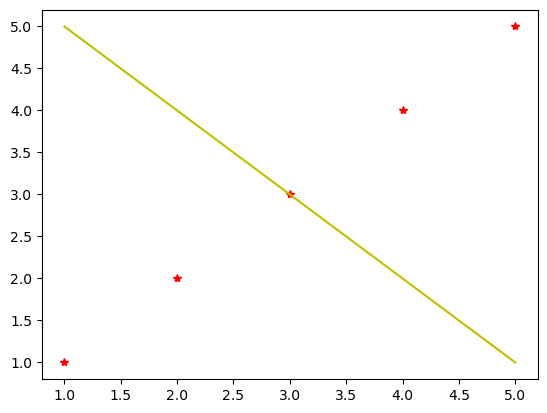

In [107]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
x2=[1,2,3,4,5]
y2=[5,4,3,2,1]
plt.plot(x,y,'r*')
plt.plot(x2,y2,'y')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

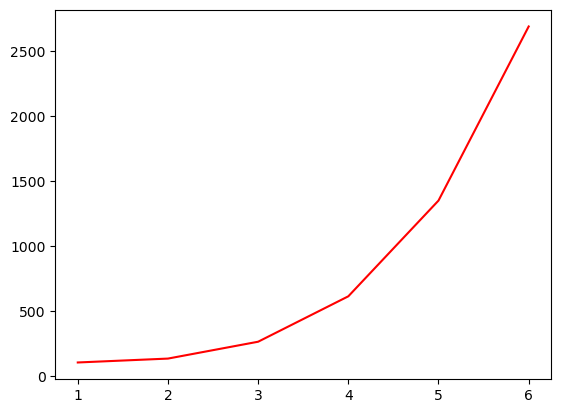

In [108]:
x=np.array([1,2,3,4,5,6])
y=2*(x**4)+100
plt.plot(x,y,'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

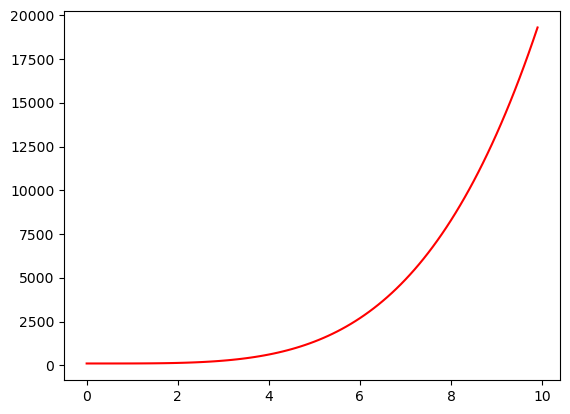

In [109]:
x=np.arange(0,10,0.1)
y=2*(x**4)+100
plt.plot(x,y,'r')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

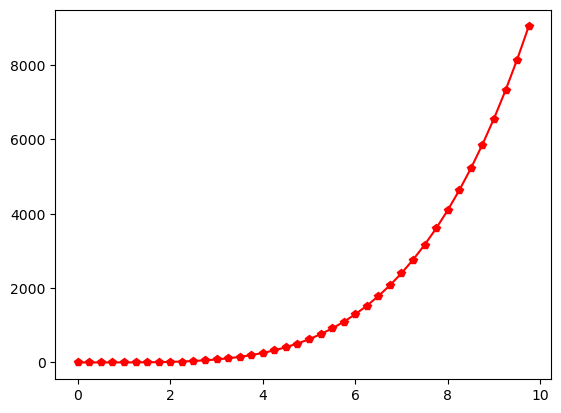

In [110]:
x=np.arange(0,10,0.25)
y=x**4
plt.plot(x,y,'r',marker='p')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

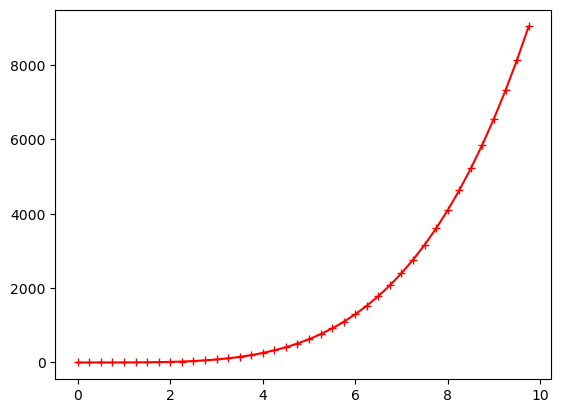

In [111]:
x=np.arange(0,10,0.25)
y=x**4
plt.plot(x,y,'r',marker='+')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

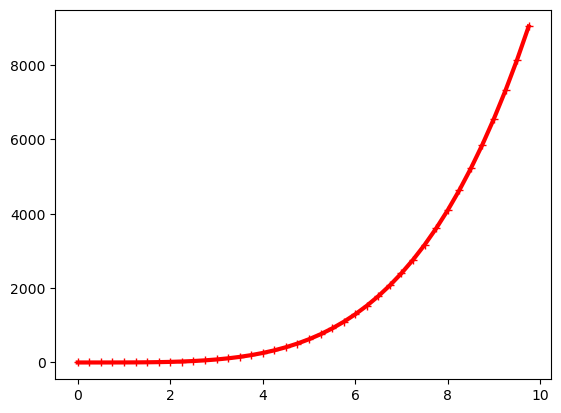

In [112]:
x=np.arange(0,10,0.25)
y=x**4
plt.plot(x,y,'r',marker='+',linewidth=3)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

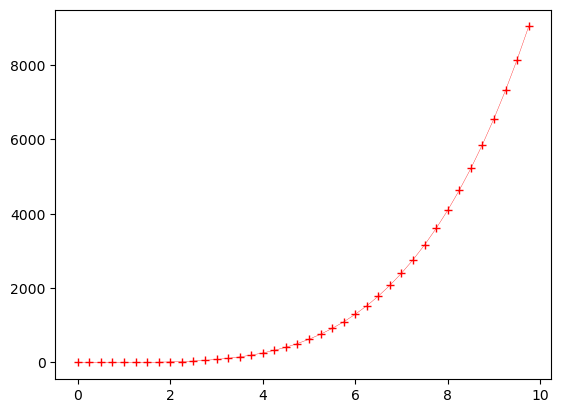

In [113]:
x=np.arange(0,10,0.25)
y=x**4
plt.plot(x,y,'r',marker='+',linewidth=.25)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

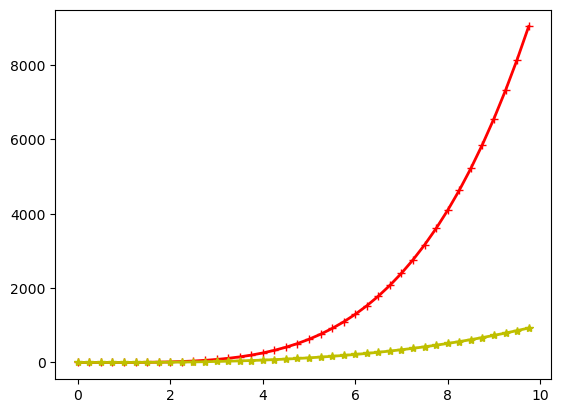

In [114]:
x=np.arange(0,10,0.25)
y=x**4
y2=x**3
plt.plot(x,y,'r',marker='+',linewidth=2)
plt.plot(x,y2,'y',marker='*',linewidth=2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

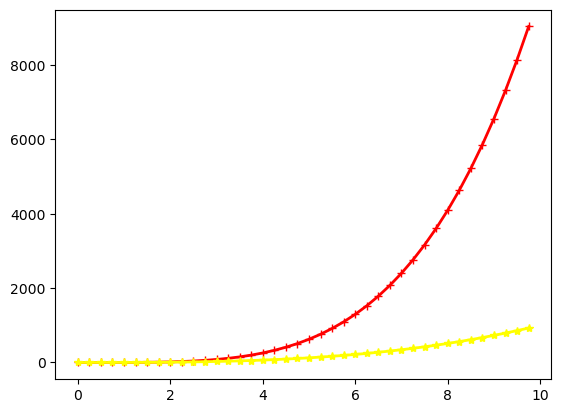

In [115]:
x=np.arange(0,10,0.25)
y=x**4
y2=x**3
plt.plot(x,y,color='red',marker='+',linewidth=2)
plt.plot(x,y2,color='yellow',marker='*',linewidth=2)
plt.show

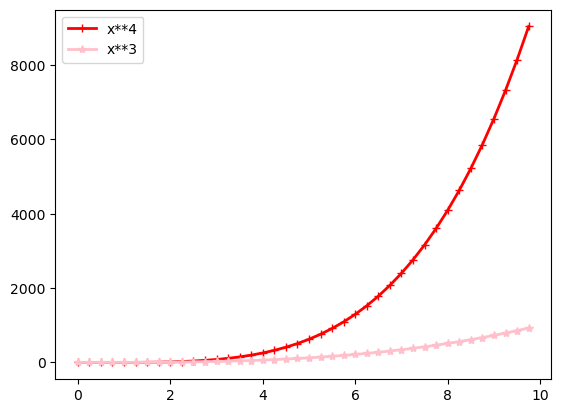

In [116]:
x=np.arange(0,10,0.25)
y=x**4
y2=x**3
plt.plot(x,y,color='red',marker='+',linewidth=2,label='x**4')
plt.plot(x,y2,color='pink',marker='*',linewidth=2,label='x**3')
#plt.show()
#for label we used legend to show
plt.legend()

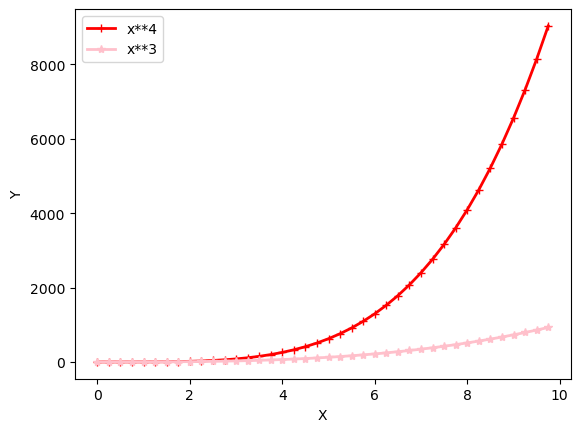

In [117]:
x=np.arange(0,10,0.25)
y=x**4
y2=x**3
plt.plot(x,y,color='red',marker='+',linewidth=2,label='x**4')
plt.plot(x,y2,color='pink',marker='*',linewidth=2,label='x**3')
plt.ylabel('Y')
plt.xlabel('X')
#plt.show()
#for label we used legend to show
plt.legend()

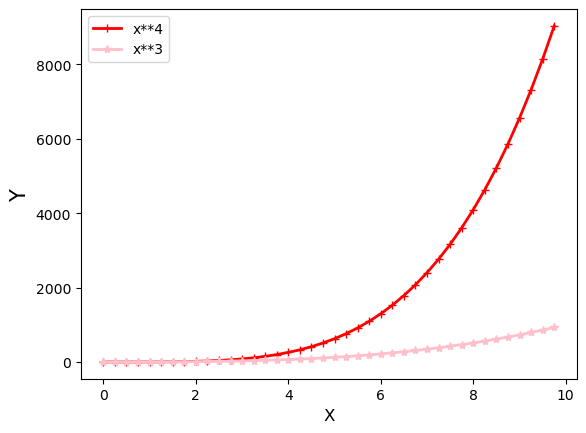

In [118]:
x=np.arange(0,10,0.25)
y=x**4
y2=x**3
plt.plot(x,y,color='red',marker='+',linewidth=2,label='x**4')
plt.plot(x,y2,color='pink',marker='*',linewidth=2,label='x**3')
plt.ylabel('Y',fontsize=15)
plt.xlabel('X',fontsize=12)
#plt.show()
#for label we used legend to show
plt.legend()

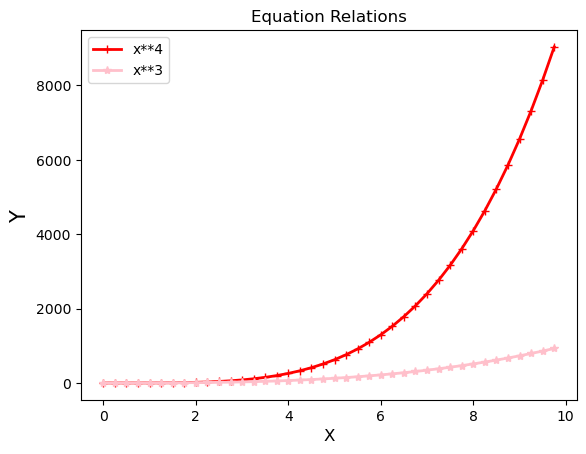

In [119]:
#give name to the graph
x=np.arange(0,10,0.25)
y=x**4
y2=x**3
plt.plot(x,y,color='red',marker='+',linewidth=2,label='x**4')
plt.plot(x,y2,color='pink',marker='*',linewidth=2,label='x**3')
plt.ylabel('Y',fontsize=15)
plt.xlabel('X',fontsize=12)
plt.title("Equation Relations")
#plt.show()
#for label we used legend to show
plt.legend()
plt.show()


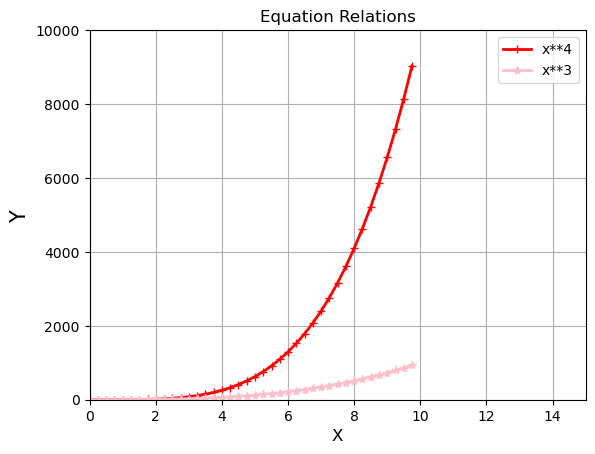

In [120]:
#give name to the graph
x=np.arange(0,10,0.25)
y=x**4
y2=x**3
plt.plot(x,y,color='red',marker='+',linewidth=2,label='x**4')
plt.plot(x,y2,color='pink',marker='*',linewidth=2,label='x**3')
plt.ylabel('Y',fontsize=15)
plt.xlabel('X',fontsize=12)
plt.title("Equation Relations")
#plt.show()
#for label we used legend to show
plt.legend()
plt.axis([0,15,0,10000])
plt.grid()
plt.show()

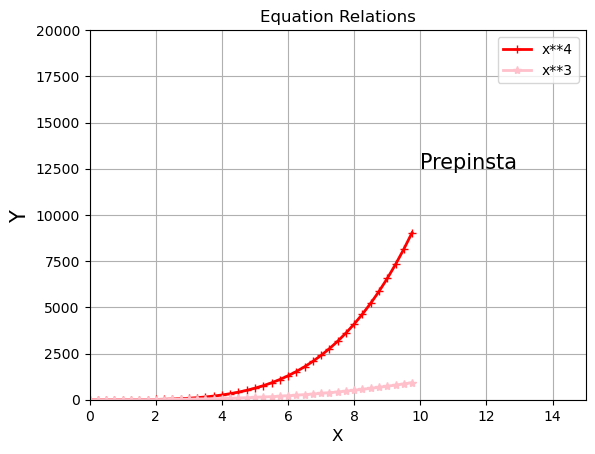

In [121]:
#give name to the graph
x=np.arange(0,10,0.25)
y=x**4
y2=x**3
plt.plot(x,y,color='red',marker='+',linewidth=2,label='x**4')
plt.plot(x,y2,color='pink',marker='*',linewidth=2,label='x**3')
plt.ylabel('Y',fontsize=15)
plt.xlabel('X',fontsize=12)
plt.title("Equation Relations")
#plt.show()
#for label we used legend to show
plt.legend()
plt.axis([0,15,0,20000])
plt.text(10,12500,"Prepinsta",fontsize=15)
plt.grid()
plt.show()

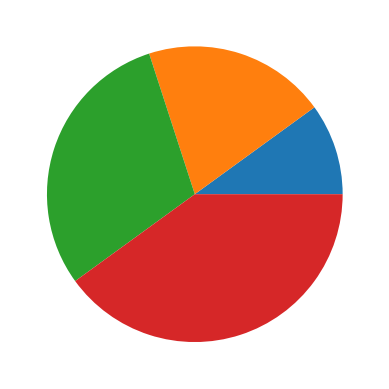

In [122]:
#piechart
profit=[10,20,30,40]
labels=['Amazon','Flipkart','Snapdeal','Jiomart']
plt.pie(profit)
plt.show()

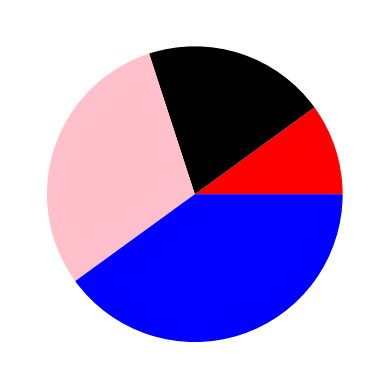

In [123]:
#For change the colours
profit=[10,20,30,40]
labels=['Amazon','Flipkart','Snapdeal','Jiomart']
color=['red','black','pink','blue']

plt.pie(profit,colors=color)
plt.show()

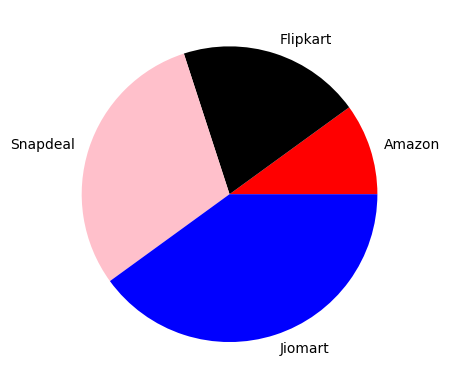

In [124]:
profit=[10,20,30,40]
labels=['Amazon','Flipkart','Snapdeal','Jiomart']
color=['red','black','pink','blue']

plt.pie(profit,colors=color,labels=labels)
plt.show()

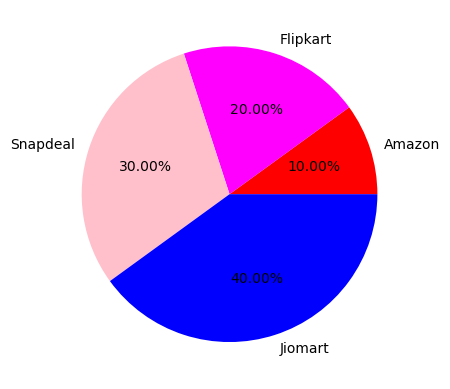

In [125]:
profit=[10,20,30,40]
labels=['Amazon','Flipkart','Snapdeal','Jiomart']
color=['red','magenta','pink','blue']

plt.pie(profit,colors=color,labels=labels,autopct='%.2f%%')
plt.show()

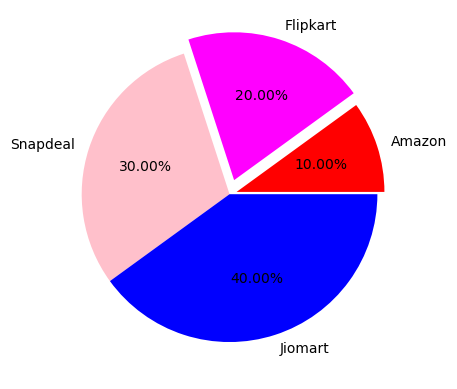

In [126]:
profit=[10,20,30,40]
labels=['Amazon','Flipkart','Snapdeal','Jiomart']
color=['red','magenta','pink','blue']
explode=[0.05,0.1,0,0]
plt.pie(profit,colors=color,labels=labels,autopct='%.2f%%',explode=explode)
plt.show()

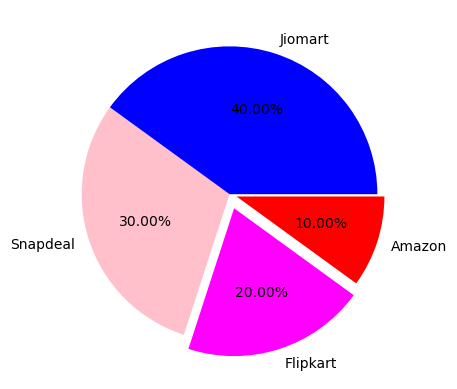

In [127]:
profit=[10,20,30,40]
labels=['Amazon','Flipkart','Snapdeal','Jiomart']
color=['red','magenta','pink','blue']
explode=[0.05,0.1,0,0]
plt.pie(profit,colors=color,labels=labels,autopct='%.2f%%',explode=explode,counterclock=False)
plt.show()

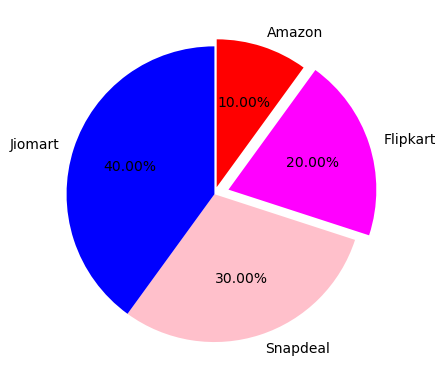

In [128]:
profit=[10,20,30,40]
labels=['Amazon','Flipkart','Snapdeal','Jiomart']
color=['red','magenta','pink','blue']
explode=[0.05,0.1,0,0]
plt.pie(profit,colors=color,labels=labels,autopct='%.2f%%',explode=explode,counterclock=False,startangle=90)
plt.show()

In [129]:
kk={'Name':['kk','pk','sk'],'Roll':[1,2,3],'Branch':['cse','pks','hks']}

In [130]:
kk

{'Name': ['kk', 'pk', 'sk'],
 'Roll': [1, 2, 3],
 'Branch': ['cse', 'pks', 'hks']}

In [131]:
kk=pd.DataFrame(kk)

In [132]:
kk

,Name,Roll,Branch
0,kk,1,cse
1,pk,2,pks
2,sk,3,hks


In [133]:
isa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [134]:
isa.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [135]:
isa.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,47,47,47,47
versicolor,50,50,50,50
virginica,49,49,49,49


In [136]:
isa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.052740,3.796575,1.215753
std,0.829562,0.436948,1.753987,0.755822
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [137]:
isa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 1 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  146 non-null    float64
 3   petal_width   146 non-null    float64
 4   species       146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 10.9+ KB


In [138]:
isa.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [139]:
isa.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [140]:
isa.duplicated().sum()

0

<AxesSubplot:xlabel='species', ylabel='count'>

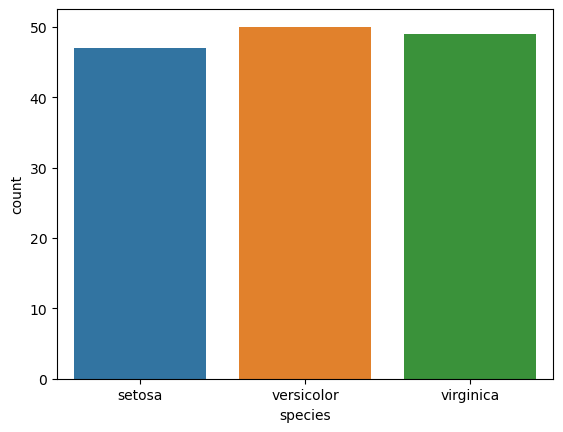

In [141]:
sns.countplot(x='species',data=isa)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

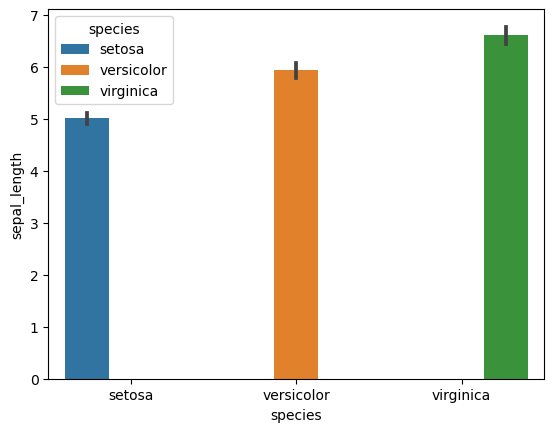

In [146]:
sns.barplot(y='sepal_length',x='species',hue='species',data=isa)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

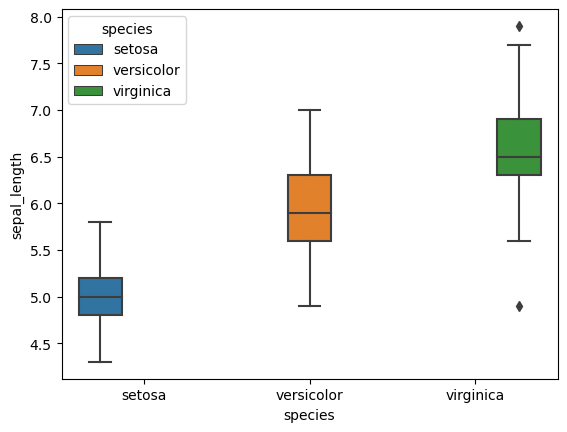

In [147]:
sns.boxplot(y='sepal_length',x='species',hue='species',data=isa)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

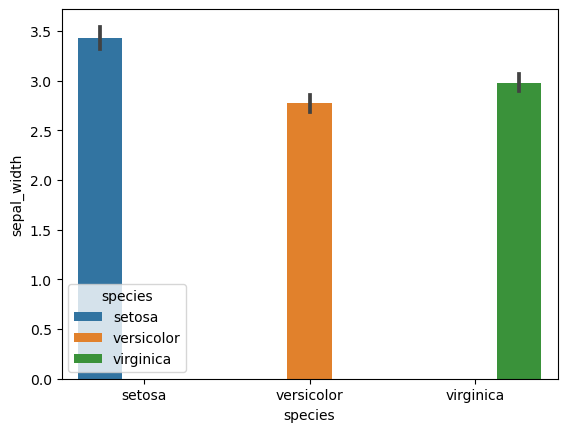

In [148]:
sns.barplot(y='sepal_width',x='species',hue='species',data=isa)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

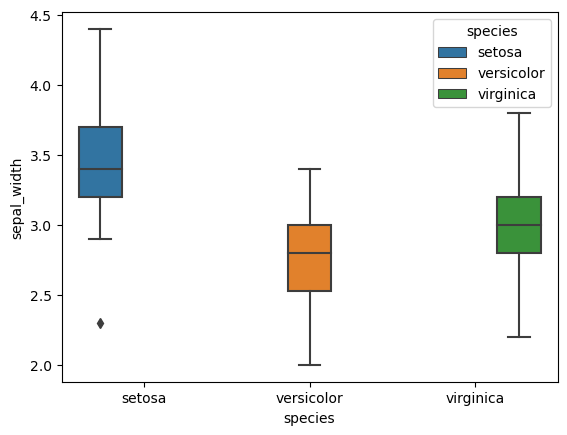

In [149]:
sns.boxplot(y='sepal_width',x='species',hue='species',data=isa)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

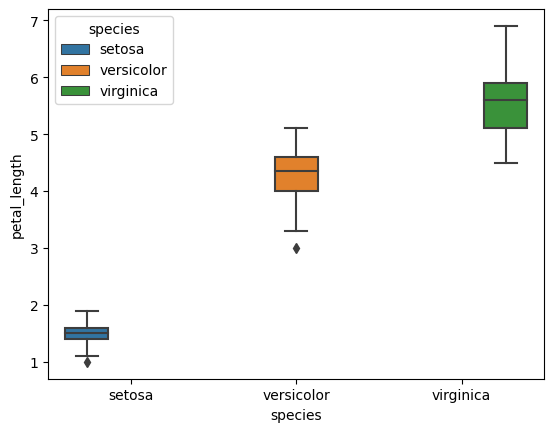

In [150]:
sns.boxplot(y='petal_length',x='species',hue='species',data=isa)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

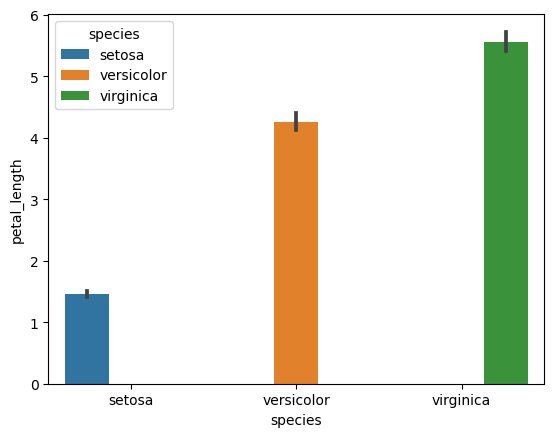

In [151]:
sns.barplot(y='petal_length',x='species',hue='species',data=isa)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

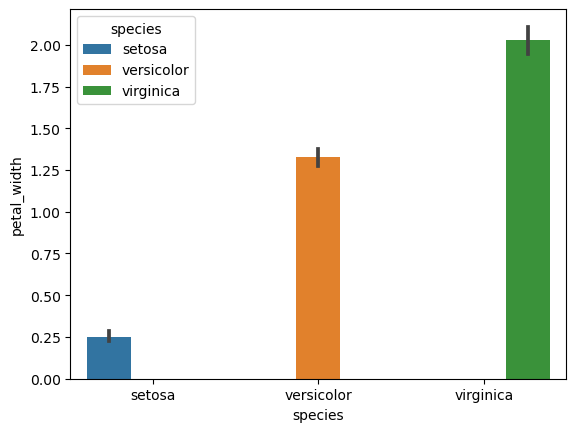

In [152]:
sns.barplot(y='petal_width',x='species',hue='species',data=isa)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

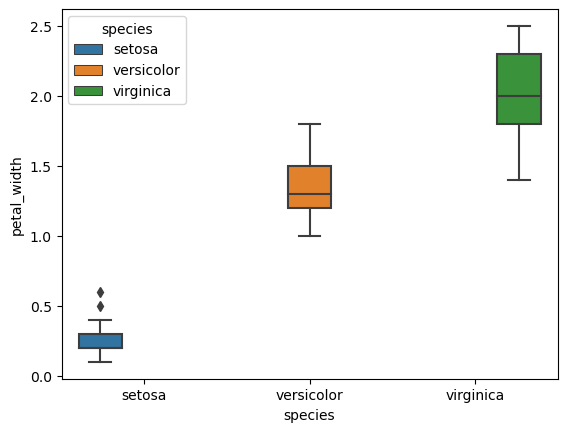

In [153]:
sns.boxplot(y='petal_width',x='species',hue='species',data=isa)

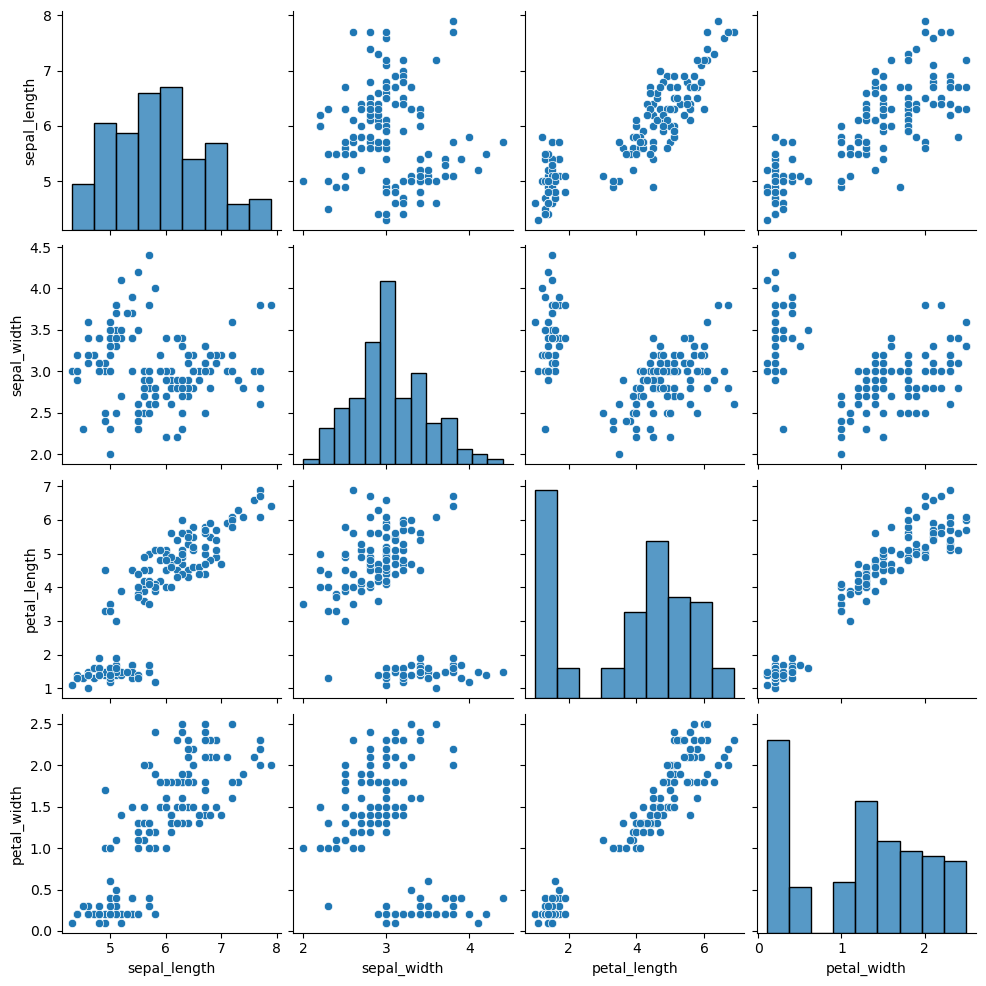

In [155]:
sns.pairplot(isa)#continous value

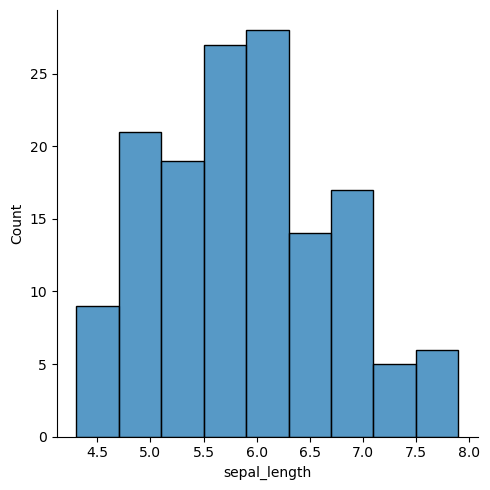

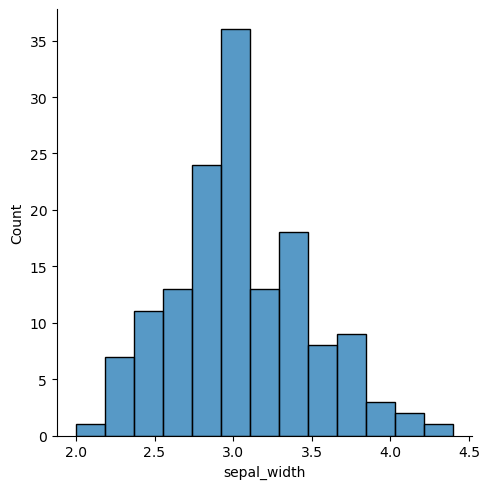

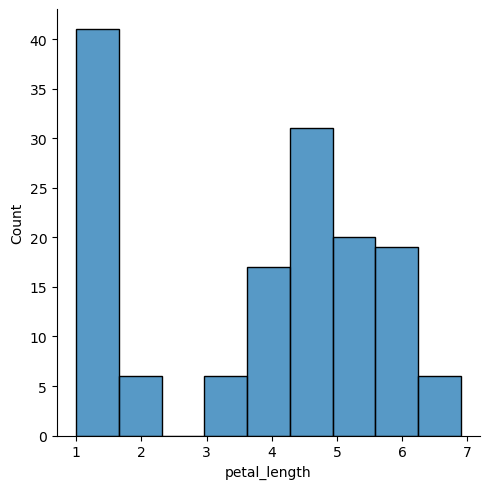

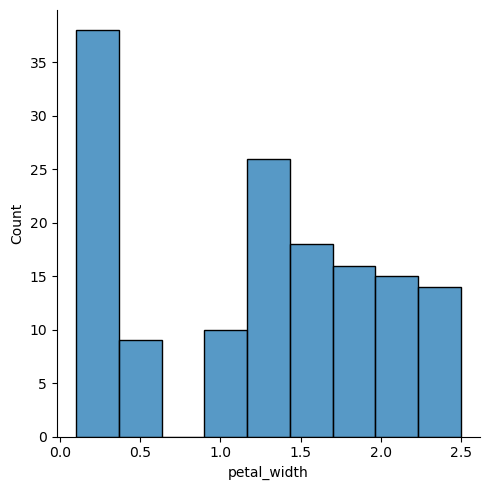

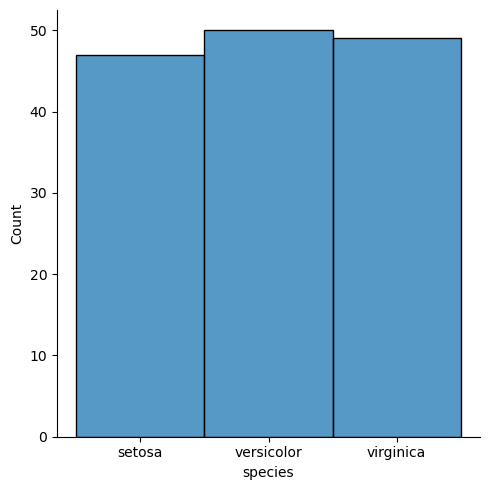

In [156]:
for columns in isa:
    sns.displot(x=columns,data=isa)

In [161]:
isa.head(115)

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
113,5.7,2.5,5.0,2.0,virginica
114,5.8,2.8,5.1,2.4,virginica
115,6.4,3.2,5.3,2.3,virginica
116,6.5,3.0,5.5,1.8,virginica


In [157]:
#Encoding
label_encode=LabelEncoder()

In [158]:
labels=label_encode.fit_transform(isa['species'])

In [159]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## 0->Setosa,1->versicolor,2->virginica

In [162]:
isa['target']=labels

In [163]:
isa

,sepal_length,sepal_width,petal_length,petal_width,species,target
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [164]:
isa=isa.drop('species',axis=1)

In [165]:
isa

,sepal_length,sepal_width,petal_length,petal_width,target
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [166]:
X=isa.drop('target',axis=1)

In [167]:
Y=isa['target']

In [168]:
X

,sepal_length,sepal_width,petal_length,petal_width
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [169]:
Y

1      0
2      0
3      0
4      0
5      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 146, dtype: int64

In [170]:
#scale the feature from MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
X=scalers.fit_transform(X)

In [171]:
X

array([[0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     , 0.06779661, 0.08333333],
       [0.38888889, 0.75      ,

In [172]:
#Standardization of data
scaler=StandardScaler()

In [173]:
X=scaler.fit_transform(X)

In [174]:
X

array([[-1.16320859e+00, -1.21115752e-01, -1.37106203e+00,
        -1.34853126e+00],
       [-1.40512947e+00,  3.38180346e-01, -1.42827125e+00,
        -1.34853126e+00],
       [-1.52608991e+00,  1.08532297e-01, -1.31385281e+00,
        -1.34853126e+00],
       [-1.04224816e+00,  1.25677254e+00, -1.37106203e+00,
        -1.34853126e+00],
       [-5.58406404e-01,  1.94571669e+00, -1.19943438e+00,
        -1.08300791e+00],
       [-1.52608991e+00,  7.97476443e-01, -1.37106203e+00,
        -1.21576958e+00],
       [-1.04224816e+00,  7.97476443e-01, -1.31385281e+00,
        -1.34853126e+00],
       [-1.76801078e+00, -3.50763801e-01, -1.37106203e+00,
        -1.34853126e+00],
       [-1.16320859e+00,  1.08532297e-01, -1.31385281e+00,
        -1.48129293e+00],
       [-5.58406404e-01,  1.48642059e+00, -1.31385281e+00,
        -1.34853126e+00],
       [-1.28416903e+00,  7.97476443e-01, -1.25664359e+00,
        -1.34853126e+00],
       [-1.28416903e+00, -1.21115752e-01, -1.37106203e+00,
      

In [175]:
## cross validation

In [176]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=42)

In [177]:
print(X_train)
print(Y_train)#ytrain is realoutput

[[ 6.51197973e-01 -5.80411849e-01  1.03172516e+00  1.17394056e+00]
 [ 2.22368366e+00 -5.80411849e-01  1.66102657e+00  1.04117889e+00]
 [ 4.09277098e-01 -3.50763801e-01  2.88005314e-01  1.11847164e-01]
 [ 7.72158411e-01 -5.80411849e-01  4.59632970e-01  3.77370513e-01]
 [-7.45646534e-02 -8.10059898e-01  1.73586876e-01 -2.86437859e-01]
 [ 5.30237535e-01  5.67828395e-01  1.26056203e+00  1.70498726e+00]
 [-1.04224816e+00  1.02712449e+00 -1.25664359e+00 -8.17484558e-01]
 [ 4.09277098e-01  7.97476443e-01  9.17306721e-01  1.43946391e+00]
 [-1.04224816e+00  7.97476443e-01 -1.25664359e+00 -1.08300791e+00]
 [-1.95525091e-01 -3.50763801e-01  2.30796095e-01  1.11847164e-01]
 [-1.16320859e+00 -1.21115752e-01 -1.37106203e+00 -1.34853126e+00]
 [ 6.51197973e-01 -8.10059898e-01  8.60097502e-01  9.08417211e-01]
 [ 1.37696060e+00  3.38180346e-01  5.16842189e-01  2.44608839e-01]
 [-1.52608991e+00  3.38180346e-01 -1.37106203e+00 -1.34853126e+00]
 [-5.58406404e-01  7.97476443e-01 -1.19943438e+00 -1.34853126e

In [178]:
# now. i have to check which model is superior for this dataset
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
    
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data  
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(Y_test, y_pred)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 
    

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.9741
Logistic Regression:
trainAccuracy: 0.9569
Naive Bayes:
trainAccuracy: 0.9569
Support Vector Machine:
trainAccuracy: 0.9741
K-Nearest Neighbors:
trainAccuracy: 0.9741
Decision Tree:
trainAccuracy: 1.0000
Random Forest:
trainAccuracy: 1.0000
Bagging:
trainAccuracy: 1.0000
AdaBoost:
trainAccuracy: 0.9655


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Gradient Boosting:
trainAccuracy: 1.0000
Extra Trees:
trainAccuracy: 1.0000
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 1.0000
Logistic Regression:
testingAccuracy: 0.9333
Naive Bayes:
testingAccuracy: 0.9333
Support Vector Machine:
testingAccuracy: 0.9667
K-Nearest Neighbors:
testingAccuracy: 0.9333
Decision Tree:
testingAccuracy: 0.9333
Random Forest:
testingAccuracy: 0.9333
Bagging:
testingAccuracy: 0.9000
AdaBoost:
testingAccuracy: 0.9333


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Gradient Boosting:
testingAccuracy: 0.9000
Extra Trees:
testingAccuracy: 0.9667


# logistic regression is best for this dataset

In [179]:
model=LogisticRegression()

In [180]:
ssk=model.fit(X_train,Y_train)

In [181]:
ssk

LogisticRegression()

## Accuracy on training data

In [182]:
X_train_prediction=ssk.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [183]:
training_data_accuracy


0.9568965517241379

## Accuracy on testing Data

In [184]:
#accuracy on test data
X_test_prediction=ssk.predict(X_test).round()#that is Ypred also
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [185]:
test_data_accuracy


0.9333333333333333

<AxesSubplot:>

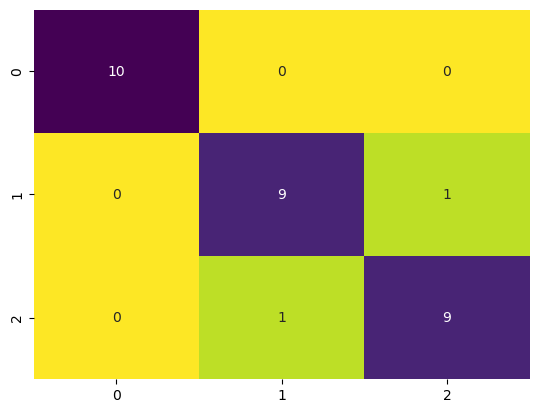

In [186]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_test_prediction,Y_test) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=ssk.classes_, xticklabels=ssk.classes_)

In [187]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## plot graph to compare result of actual and target value


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Logistic Regression')

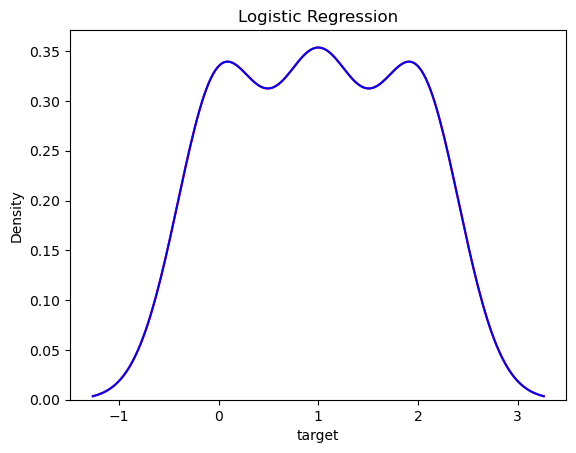

In [188]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_test_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Logistic Regression')

## making a predictive System for testing the data 

In [192]:
# making a predictive System
input_data=(4.9,3.0,1.4,0.2)
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=scaler.transform(std_data)
print(std_data)
prediction=ssk.predict(std_data)#model=Randomforest classification
print("target:",prediction)
if(prediction==0):
    print("Class of flower is:Setosa")
elif(prediction==1):
    print("Class of flower is:versicolor")
elif(prediction==2):
    print("Class of Flower is:virginica")

[[0.16666667 0.41666667 0.06779661 0.04166667]]
[[-1.16320859 -0.12111575 -1.37106203 -1.34853126]]
target: [0]
Class of flower is:Setosa


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [190]:
#0->Setosa,1->versicolor,2->virginica

In [191]:
isa.head()

,sepal_length,sepal_width,petal_length,petal_width,target
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [196]:
kkl=ProfileReport(isa)

In [198]:
kk

In [199]:
kk.to_file("output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]